# Machine Learning : Régression Linéaire et Polynômiale




In [1]:
import numpy as np
import matplotlib.pyplot as plt


## 1. Régression

### a) Modèle

In [2]:
def modele(X, theta):
    return np.dot(X,theta)

### b) Fonction coût

In [3]:
def cost_function(X, y, theta):
    m = len(y)
    return (1/(2*m))*((modele(X, theta) - y)**2).sum()

### c) Gradient

In [4]:
def gradient(X, y, theta):
    m = len(y)
    return (1/m)*X.T.dot(modele(X, theta) - y)

### d) Gradient Descent

In [5]:
def gradient_descent(X, y, theta, learning_rate, nb_iterations):
    historique_couts = []
    for i in range(nb_iterations):
        historique_couts.append(cost_function(X, y, theta))
        theta -= learning_rate * gradient(X, y, theta)
        
    return theta, historique_couts

------------------------------------------------------

                                                          
                                                          
## Utilisation d'une base de données de poissons pour le modèle de régression linéaire
#### Source : https://lionbridge.ai

In [6]:
import csv

In [7]:
dataset = []
with open('fish_dataset.csv', 'r') as f:
    datas = csv.reader(f)
    for row in datas:
        dataset.append(row)
del dataset[0]
dataset = np.array(dataset)
dataset

array([['Bream', '242', '23.2', ..., '30', '11.52', '4.02'],
       ['Bream', '290', '24', ..., '31.2', '12.48', '4.3056'],
       ['Bream', '340', '23.9', ..., '31.1', '12.3778', '4.6961'],
       ...,
       ['Smelt', '12.2', '12.1', ..., '13.8', '2.277', '1.2558'],
       ['Smelt', '19.7', '13.2', ..., '15.2', '2.8728', '2.0672'],
       ['Smelt', '19.9', '13.8', ..., '16.2', '2.9322', '1.8792']],
      dtype='<U9')

In [8]:
dataset = np.delete(dataset, 0, axis=1).astype(float)

In [9]:
dataset

array([[2.42000e+02, 2.32000e+01, 2.54000e+01, 3.00000e+01, 1.15200e+01,
        4.02000e+00],
       [2.90000e+02, 2.40000e+01, 2.63000e+01, 3.12000e+01, 1.24800e+01,
        4.30560e+00],
       [3.40000e+02, 2.39000e+01, 2.65000e+01, 3.11000e+01, 1.23778e+01,
        4.69610e+00],
       [3.63000e+02, 2.63000e+01, 2.90000e+01, 3.35000e+01, 1.27300e+01,
        4.45550e+00],
       [4.30000e+02, 2.65000e+01, 2.90000e+01, 3.40000e+01, 1.24440e+01,
        5.13400e+00],
       [4.50000e+02, 2.68000e+01, 2.97000e+01, 3.47000e+01, 1.36024e+01,
        4.92740e+00],
       [5.00000e+02, 2.68000e+01, 2.97000e+01, 3.45000e+01, 1.41795e+01,
        5.27850e+00],
       [3.90000e+02, 2.76000e+01, 3.00000e+01, 3.50000e+01, 1.26700e+01,
        4.69000e+00],
       [4.50000e+02, 2.76000e+01, 3.00000e+01, 3.51000e+01, 1.40049e+01,
        4.84380e+00],
       [5.00000e+02, 2.85000e+01, 3.07000e+01, 3.62000e+01, 1.42266e+01,
        4.95940e+00],
       [4.75000e+02, 2.84000e+01, 3.10000e+01, 3.6

In [10]:
y = dataset[:, 0].copy() # Weight
x1 = dataset[:, 4].copy() # Height

# Correction des dimensions des matrices
y = y.reshape(y.shape[0],1)
x1 = x1.reshape(x1.shape[0],1)

#### Dans cet exemple, nous cherchons donc à prédire la masse du poisson à partir de sa longueur

In [11]:
X1 = np.hstack((x1, np.ones(x1.shape)))

In [12]:
# Création du vecteur theta
def creer_theta(X):
    return np.random.randn(X.shape[1],1)

theta = creer_theta(X1)
theta

array([[ 0.94909688],
       [-0.71139681]])

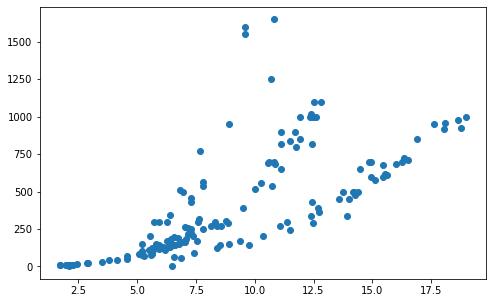

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(x1, y)
plt.show()

In [14]:
theta_final, historique_cout = gradient_descent(X1, y, theta, learning_rate=0.01, nb_iterations=2000)

In [15]:
theta_final

array([[  60.15378033],
       [-140.62263872]])

### Représentation du modèle de régression linéaire

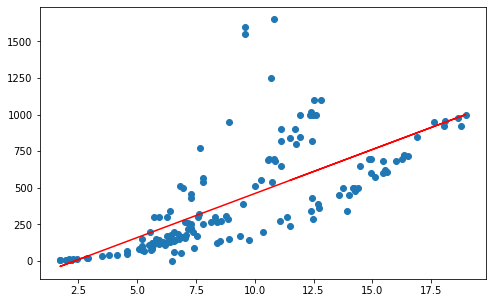

In [16]:
predictions = modele(X1, theta_final)

plt.figure(figsize=(8,5))
plt.scatter(x1, y)
plt.plot(x1, predictions, c='r')
plt.show()

### Evolution de la fonction coût avec le nombre d'itérations

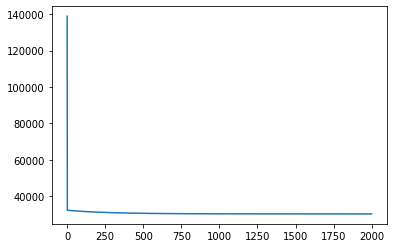

In [17]:
plt.plot(range(2000), historique_cout)

### Evaluation de la performance du modèle par le coefficient de détermination

In [18]:
def coef_det(y, prediction):
    numerateur = ((y - prediction)**2).sum()
    denominateur = ((y - y.mean())**2).sum()
    return 1 - (numerateur/denominateur)

In [19]:
# Coefficient de détermination de notre modèle de régression linéaire
coef_det(y, predictions)

0.524655591596955

## Regression linéaire avec toutes les features

In [153]:
x11 = dataset[:, 1:5].copy() # Height
x11.shape

(159, 4)

In [154]:
X11 = np.hstack((x11, np.ones((x11.shape[0],1))))

In [155]:
theta11 = creer_theta(X11)
theta11

array([[-0.03602134],
       [ 0.32982572],
       [-1.512721  ],
       [-0.59767008],
       [ 0.0226726 ]])

In [156]:
theta_final11, historique_cout11 = gradient_descent(X11, y, theta11, learning_rate=0.000001, nb_iterations=20000)

In [157]:
theta_final11

array([[ 5.16934182],
       [ 5.79991006],
       [ 4.31777621],
       [ 2.60757574],
       [-0.99216431]])

### Représentation de la regression pour toutes les features

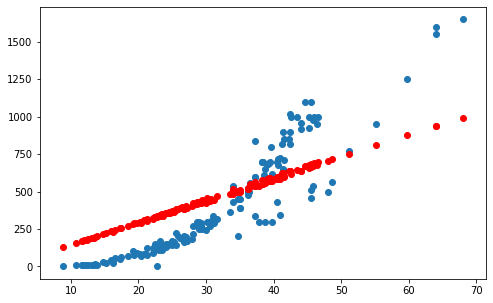

In [166]:
predictions_11 = modele(X11, theta_final11)

plt.figure(figsize=(8,5))
plt.scatter(x11[:, 2].reshape(x11[:, 2].shape[0],1), y)
plt.scatter(x11[:, 2].reshape(x11[:, 2].shape[0],1), predictions_11, c='r')
plt.show()

In [168]:
# Coefficient de détermination de notre modèle de régression linéaire
coef_det(y, predictions_11)

0.6305583802012313

### Régression polynômiale

In [96]:
# L'équation de régression devra être sous la forme ax² + bx + c
# Pour cela il nous faut réécrire la matrice des features
X2 = np.hstack((x1**2, X1))

In [102]:
theta_2 = creer_theta(X2)
theta_final_2, historique_cout_2 = gradient_descent(X2, y, theta_2, learning_rate=0.0000001, nb_iterations=50000)

In [103]:
theta_final_2

array([[3.37094953],
       [1.84017846],
       [0.55641349]])

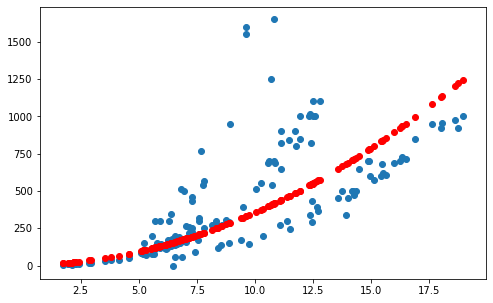

In [104]:
predictions_2 = modele(X2, theta_final_2)

plt.figure(figsize=(8,5))
plt.scatter(x1, y)
plt.scatter(x1, predictions_2, c='r')
plt.show()

### Evolution du coût

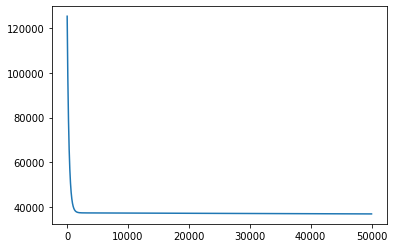

In [107]:
plt.plot(range(50000), historique_cout_2)
plt.show()

In [106]:
# Coefficient de détermination de notre modèle de régression linéaire
predictions_2 = modele(X2, theta_final_2)
coef_det(y, predictions_2)

0.42204354722273063